# 모델 만들기 (기초)

In [1]:
import pandas as pd
import numpy as np

모델 만들기 과정
- 데이터 클렌징
    - Na값 제거
    - 데이터들 숫자형으로 통일 (더미변수 이용)
    - y값, x값 분리, 필요하다면 train,test 데이터도 분리
- 모델 적합
    - 알고리즘 선택
    - 하이퍼 파라미터 선택
- 모델 점수 확인
    - 모델 유형에 따른 평가 점수 선택
    - cross-validation

#  1.데이터 클렌징

In [2]:
county = pd.read_csv("kc_house_data.csv")

In [3]:
county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


모델에 넣기 위해서는 순수한 수치형 자료만 들어가야 함
- id - 키의 역할, 범주형이며 모델에 불필요 -> 제거
- date - 여기서는 문자형 데이터로 저장되어 있음 -> 사용해주기 위해서는 전처리가 필요함
- price - 예측하고자 하는 목표 -> y값으로 따로 저장해주기
- bedrooms - 이산형 자료 이지만 연속형 취급해서 사용해주면 됨 -> 그대로 사용
- zip-code - 명목형 자료이므로 더미화를 해주어야함 -> 더미화
- lat,long - 연속형 자료이지만 위경도 이므로 집값에 직접적인 영향은 미치지 않음 -> 제거

### 1-a. Nan값 처리

In [4]:
# Nan값 확인
county.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
# Nan값 버리기
county = county.dropna()

### 1-b y 값 설정해주기

In [6]:
y_dt = county.loc[:,"price"]

In [7]:
y_dt.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### 1-c 연속형 변수들 x값에 할당해주기

In [8]:
x_dt = county.loc[:,["bedrooms"]]

In [9]:
x_dt["bathrooms"] =  county.loc[:,"bathrooms"]

In [10]:
x_dt.head()

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00


### 1-d 명목형 변수들 더미화 시켜서 할당해주기

In [11]:
pd.get_dummies(county["zipcode"],drop_first=True).head()

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_dt= pd.merge(x_dt,pd.get_dummies(county["zipcode"],drop_first=True),left_index=True,right_index=True)

In [13]:
x_dt.head()

,bedrooms,bathrooms,98002,98003,98004,98005,98006,98007,98008,98010,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,3,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. 모델 적합

### sklearn 패키지 사용하기
https://scikit-learn.org/stable/

In [14]:
# 사이킷런 패키지에서 필요한 함수를 불러오기
from sklearn.ensemble import RandomForestRegressor

In [15]:
#알고리즘을 인스턴스에 저장 하기
rf = RandomForestRegressor()

### 인스턴스의 인수와 어트리뷰트, 메서드 확인하기 (shift+tab)

### 하이퍼 파라미터 - 모델의 구조를 결정짓는 숫자들
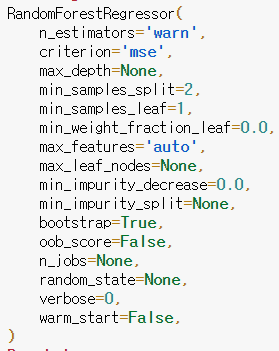  

   
 하이퍼 파라미터 들이 매우 많음 -> 그리드 서치/ 랜덤 서치로 최적화 하자

### 어트리뷰트
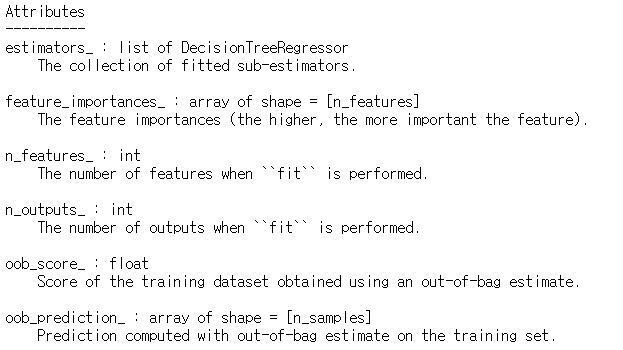

### 메서드
사이킷런 홈페이지에서 확인
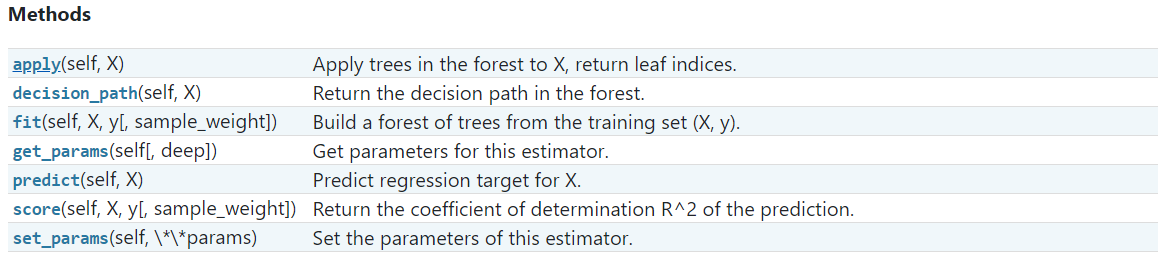

### 2-a 모델 적합(fitting) 시키기

In [16]:
# fit 메서드 사용
rf.fit(x_dt,y_dt)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [17]:
# predict를 이용해서 주어진 x에 대한 예측값을 반환해줌
rf.predict(x_dt)

array([220570.47459506, 438879.76060576, 295347.66666667, ...,
       366392.06505636, 589968.20865493, 366392.06505636])

In [18]:
pd.DataFrame(rf.predict(x_dt))

,0
0,220570.474595
1,438879.760606
2,295347.666667
3,709793.333333
4,481502.167782
...,...
21608,539718.666513
21609,479799.876194
21610,366392.065056
21611,589968.208655


### 2-b. 하이퍼 파라미터 튜닝

#### 그리드 서치

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param = {"n_estimators":(100,200,300),"max_depth":(5,10,20)}
grid = GridSearchCV(rf, param_grid = param,cv=2)

In [21]:
grid.fit(x_dt,y_dt)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': (5, 10, 20),
         

In [22]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [23]:
rf = RandomForestRegressor(max_depth= 20, n_estimators= 300)

In [24]:
rf.fit(x_dt,y_dt)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### 2-c. 모델 평가

모델 평가 점수 -> ppt참고

#### 크로스 밸리데이션
- 데이터 셋을 n-등분하여 n-1개로 훈련하고 나머지로 적합을 시키는 방식
- 오버피팅을 관리하기 위해 사용 (오버피팅 -> ppt 참고)

In [25]:
from sklearn.model_selection import cross_validate

In [26]:
cv = cross_validate(rf,x_dt,y_dt,scoring="r2",cv=5,return_train_score=True)

사이킷런에서 제공하는 스코어 정보들  
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [27]:
cv

{'fit_time': array([18.60658646, 17.99502015, 18.1536901 , 18.87106204, 18.7270515 ]),
 'score_time': array([0.12167525, 0.11768031, 0.13390279, 0.12965345, 0.12860727]),
 'test_score': array([0.56116111, 0.56192756, 0.55977551, 0.58476044, 0.47795324]),
 'train_score': array([0.70142198, 0.70076878, 0.7053065 , 0.70498973, 0.70517436])}

트레인은 0.7 가량, 테스트는 0.56  
-> 오버 피팅 되어있음

# 별도.오버피팅 시각화

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [29]:
import matplotlib.pyplot as plt

In [104]:
x1 = np.linspace(0,0.5,100)
x2 = np.linspace(0.5,1,100)
y1 = np.log(x1+0.5) + np.random.normal(0,0.1,100)
y2 = np.sin(x2*20)+np.log(1) + np.random.normal(0,0.4,100)
x_dt = pd.DataFrame([*x1,*x2])
y_dt = pd.DataFrame([*y1,*y2])

## 원본 데이터

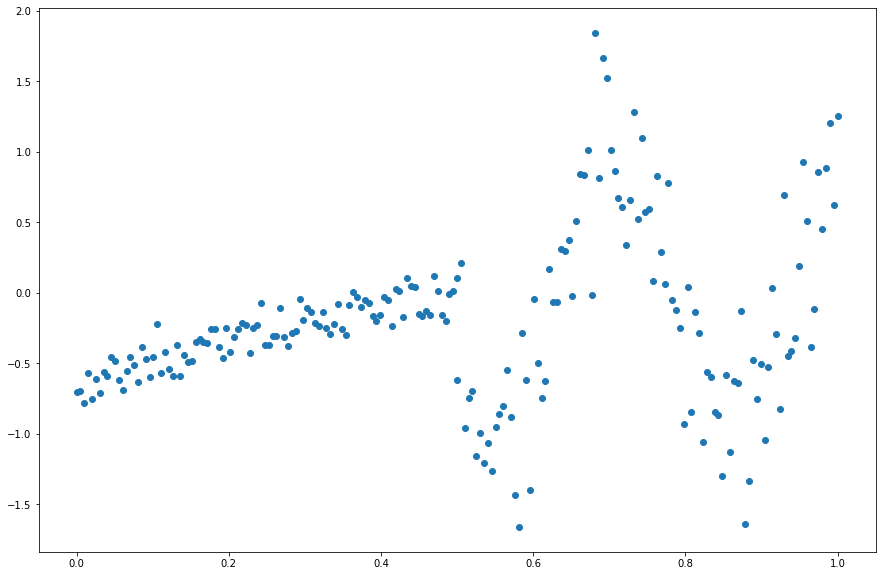

In [105]:
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.show()

## 피쳐 4개 사용(언더피팅)

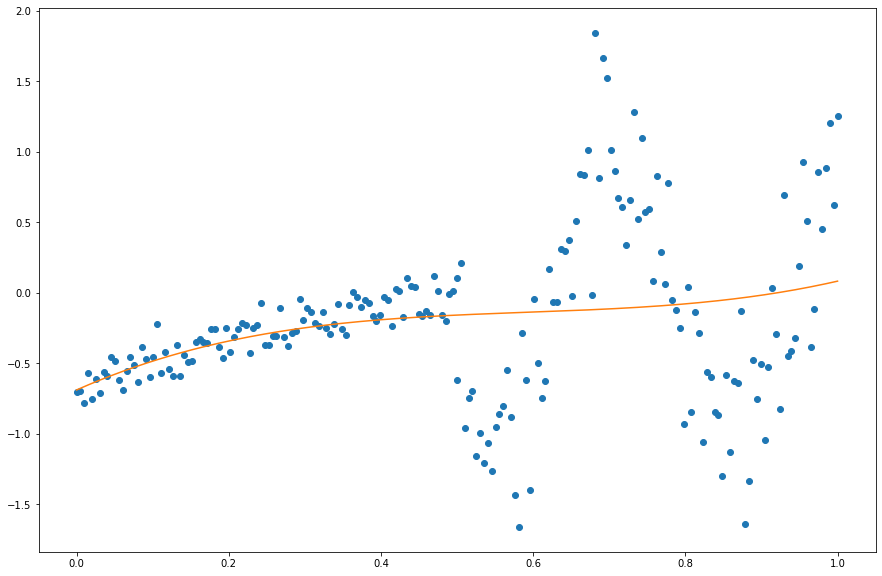

In [106]:
x_dt1 = pd.DataFrame(np.ones(shape=(200,1)))
for i in range(1,4) : 
    x_dt1[str(i)] = x_dt**i
lr1 =  LinearRegression()
lr1.fit(x_dt1,y_dt)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr1.predict(x_dt1))
plt.show()

## 피쳐 20개 사용

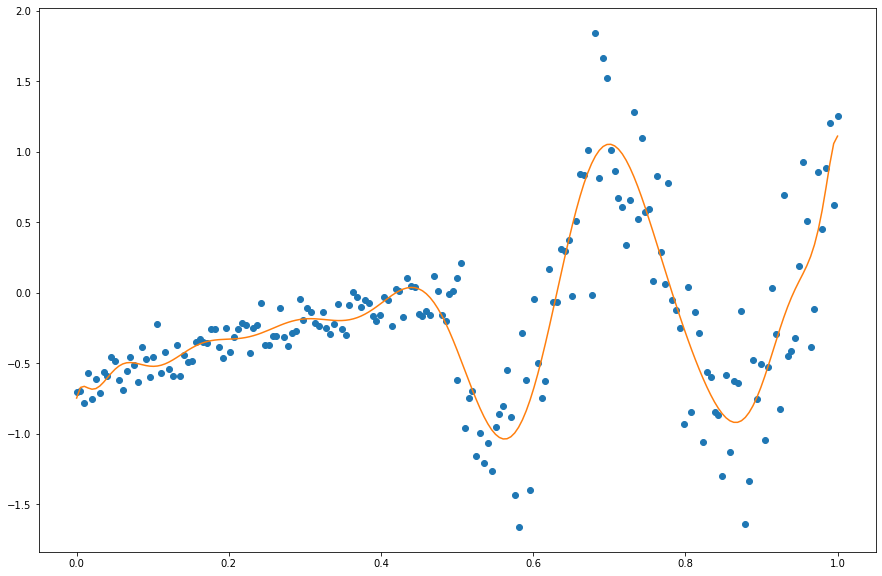

In [108]:
x_dt2 = pd.DataFrame(np.ones(shape=(200,1)))
for i in range(1,20) : 
    x_dt2[str(i)] = np.array([*x1,*x2])**i
lr2 =  LinearRegression()
lr2.fit(x_dt2,y_dt)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr2.predict(x_dt2))
plt.show()

## 피쳐 500개 사용(오버피팅)

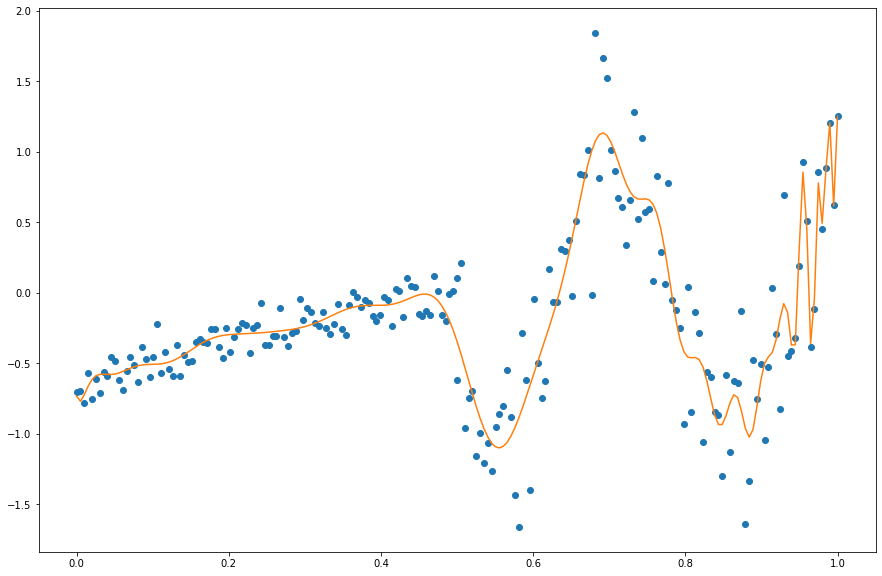

In [109]:
x_dt3 = pd.DataFrame(np.ones(shape=(200,1)))
for i in range(1,500) : 
    x_dt3[str(i)] = x_dt**i
lr3 =  LinearRegression()
lr3.fit(x_dt3,y_dt)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr3.predict(x_dt3))
plt.show()

## 만약 Train Data로 전체의 75%를 쓴다면?

In [96]:
from sklearn.utils.random import sample_without_replacement

In [112]:
random_ind = sample_without_replacement(200,150)
y_dt_less = y_dt.iloc[random_ind,:]

## 피쳐가 4개인 경우

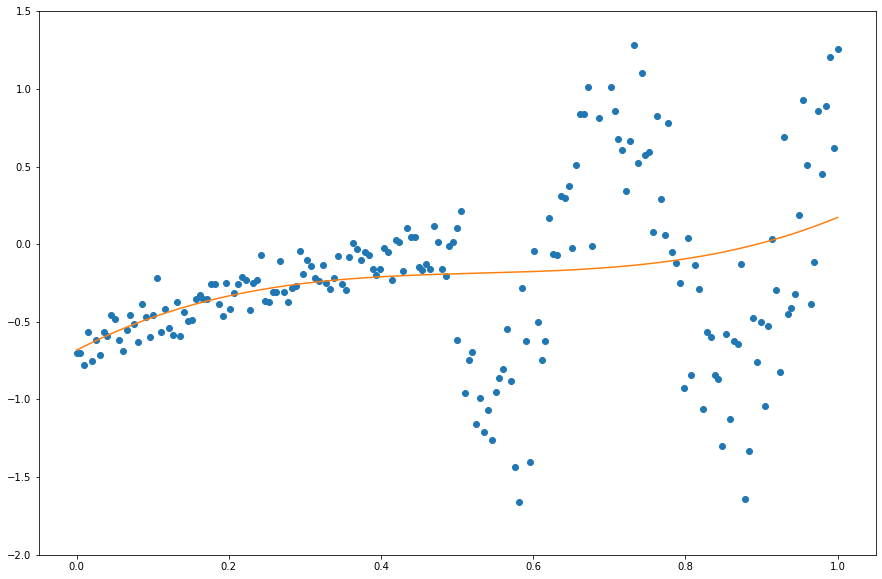

In [122]:
x_dt1_less = x_dt1.iloc[random_ind,:]
lr1_less =  LinearRegression()
lr1_less.fit(x_dt1_less,y_dt_less)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr1_less.predict(x_dt1))
plt.ylim([-2,1.5])
plt.show()

## 피쳐가 20개인 경우

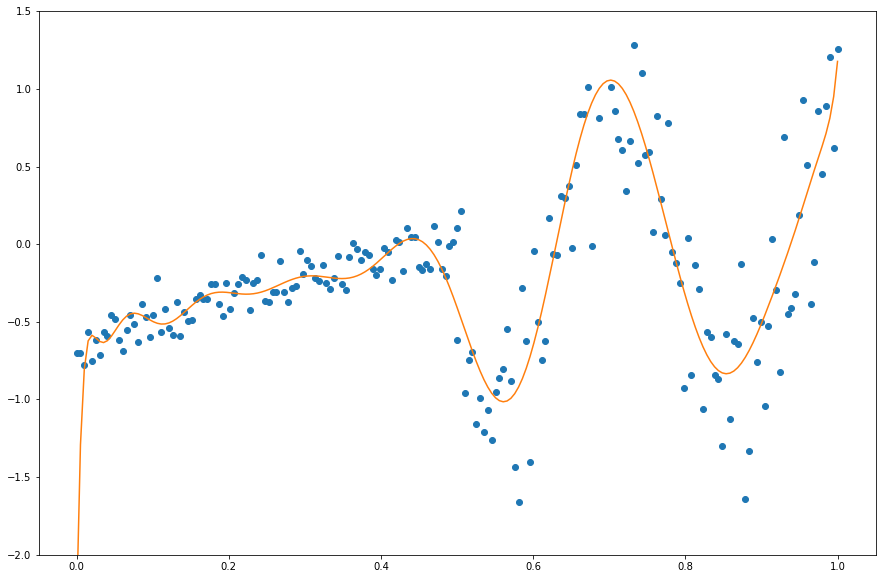

In [119]:
x_dt2_less = x_dt2.iloc[random_ind,:]
lr2_less =  LinearRegression()
lr2_less.fit(x_dt2_less,y_dt_less)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr2_less.predict(x_dt2))
plt.ylim([-2,1.5])
plt.show()

## 피쳐가 500개인 경우

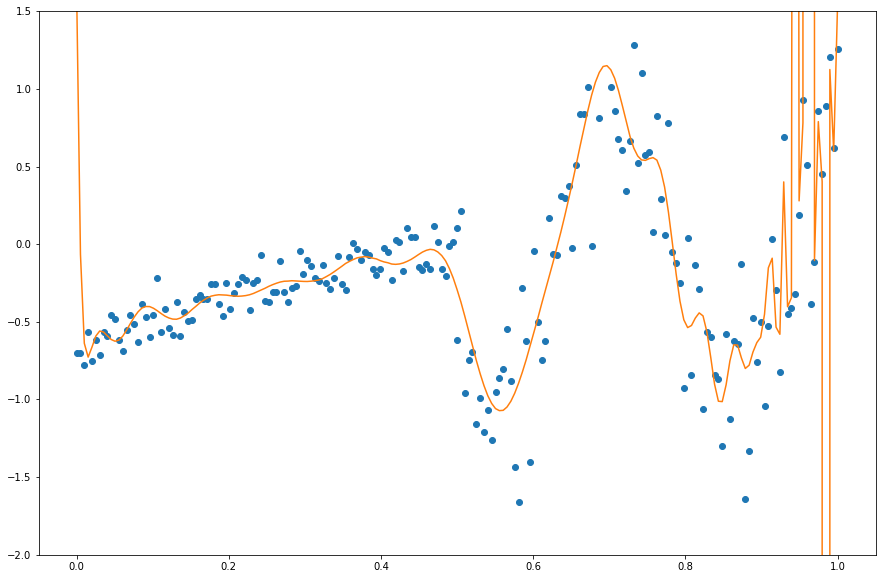

In [121]:
x_dt3_less = x_dt3.iloc[random_ind,:]
lr3_less =  LinearRegression()
lr3_less.fit(x_dt3_less,y_dt_less)
fig = plt.figure(figsize=(15,10))
plt.plot(x_dt,y_dt,"o")
plt.plot(x_dt,lr3_less.predict(x_dt3))
plt.ylim([-2,1.5])
plt.show()

## 샘플이 가온데 100개일시

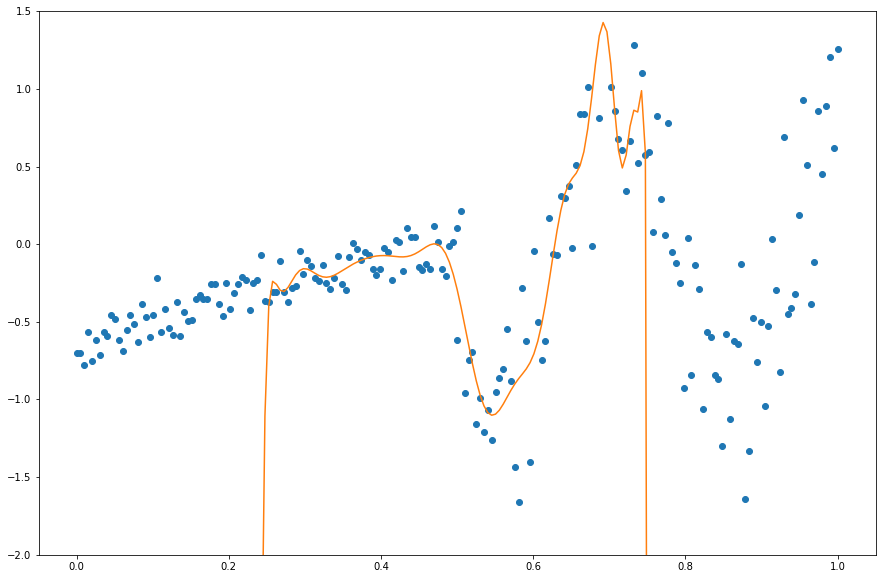

In [123]:
lr3_less =  LinearRegression()
lr3_less.fit(x_dt3[50:150],np.array([*y1,*y2])[50:150])
fig = plt.figure(figsize=(15,10))
plt.plot([*x1,*x2],[*y1,*y2],"o")
plt.plot([*x1,*x2],lr3_less.predict(x_dt3))
plt.ylim([-2,1.5])
plt.show()

## 세 모델의 cv 점수 비교

In [84]:
from sklearn.utils import shuffle

In [85]:
x_dt1,x_dt2,x_dt3,y_dt = shuffle(x_dt1,x_dt2,x_dt3,y_dt)

In [86]:
cv1 = cross_validate(lr1,x_dt1,y_dt,scoring="r2",cv=3,return_train_score=True)
cv2 = cross_validate(lr2,x_dt2,y_dt,scoring="r2",cv=3,return_train_score=True)
cv3 = cross_validate(lr3,x_dt3,y_dt,scoring="r2",cv=3,return_train_score=True)

In [87]:
cv1

{'fit_time': array([0.00299215, 0.00251675, 0.00299168]),
 'score_time': array([0.00099635, 0.00098491, 0.00099754]),
 'test_score': array([0.03491639, 0.06740515, 0.05371431]),
 'train_score': array([0.09707033, 0.08548017, 0.08777213])}

In [88]:
cv2

{'fit_time': array([0.00199437, 0.00199389, 0.00299215]),
 'score_time': array([0.00099778, 0.00199533, 0.00099707]),
 'test_score': array([0.76012669, 0.74063908, 0.76386089]),
 'train_score': array([0.7617401 , 0.77123554, 0.76030201])}

In [89]:
cv3

{'fit_time': array([0.03490829, 0.03091741, 0.02990937]),
 'score_time': array([0.00102925, 0.00099754, 0.00099778]),
 'test_score': array([ 7.29037009e-01, -1.16054452e+03, -1.95019976e+01]),
 'train_score': array([0.77791571, 0.78504083, 0.776672  ])}